In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

sns.set()
sns.set(font='SimHei')

In [2]:
dataSet = pd.read_csv('douban.csv')
dataSet = dataSet.drop('id', axis=1).drop('douban_id', axis=1)
dataSet.describe()

,collections,rating_num,five_star,four_star,three_star,two_star,one_star
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,56943.774257,4.904752,0.054139,0.121224,0.308141,0.256164,0.260323
std,93215.824983,1.295236,0.060278,0.114427,0.144731,0.108302,0.228702
min,67.000000,2.100000,0.000000,0.000000,0.000000,0.005000,0.002000
25%,2229.000000,3.900000,0.023000,0.039000,0.189000,0.181000,0.072000
50%,19289.000000,4.900000,0.036000,0.082000,0.320000,0.275000,0.197000
75%,68560.000000,5.800000,0.061000,0.160000,0.427000,0.340000,0.404000
max,589938.000000,8.600000,0.593000,0.535000,0.607000,0.479000,0.989000


In [3]:
star_list = list()
dataSet = dataSet.drop(dataSet.columns[[0, -1,-2,-3,-4,-5,-6]], axis=1)
dataSet['star'].apply(lambda x:star_list.extend(x.split('_')))
star_list = list(set(star_list))
star_list

['浜野谦太',
 '罗恩·彼得·琼斯',
 '李淳',
 '蒿怡帆',
 '涂圣成',
 '吴刚',
 '劳伦·马林',
 '艾莉森·海萨克',
 'Nathan Jones',
 '白宇',
 '埃里克·罗德尔',
 '程野',
 '韩彦博',
 '威尔·布里顿',
 '伊丽莎白·莫斯',
 '奚美丽',
 '贾斯汀·查特文',
 '杨懿玎',
 '陈炳强',
 '赵立新',
 '波伊德·霍布鲁克',
 '花粥',
 '张秋芳',
 '迪耶戈·博内塔',
 '马薇薇',
 '李成敏',
 '陈键锋',
 '凯尔·索列尔',
 '刘志宏',
 '王晓棠',
 '福岛莉拉',
 '温碧霞',
 '张钧甯',
 '刘北辰',
 'Guy Griffithe',
 '瑞贝卡·瑞滕豪斯',
 '李程远',
 '韩永华',
 '黄轩',
 '张雨绮',
 '东出昌大',
 '加雷特·拉特利夫·亨森',
 '吕晓霖',
 '孙良君',
 '西蒙子',
 '詹姆斯·兰索恩',
 '霸易',
 '顾冠忠',
 '罗兰',
 '黄光亮',
 '吴岱融',
 '刘笑语',
 '萝丝·拜恩',
 '帕拉巴斯',
 '爱德华·詹姆斯·奥莫斯',
 '中岛美嘉',
 '金秀贤',
 '温超',
 '古天乐',
 '刘冰',
 '曹瑞',
 '斯黛芬·道森',
 '戴思杰',
 'RJ·米特',
 'Adrian Collins',
 '约翰·麦克菲尔森',
 '顾小白',
 '周明汕',
 'C·托马斯·豪威尔',
 'Billy Ashworth',
 '黄璐',
 '泰勒·约翰·史密斯',
 '阿方索·A·杰克逊',
 '斯图尔特·麦克奎里',
 '万茜',
 '卢·坦普尔',
 '玉城蒂娜',
 '大谷主水',
 '春夏',
 '曾咏欣',
 'Arjunan',
 '杰玛·阿特登',
 '张扬',
 'Kyle Hotz',
 '小栗旬',
 '托马斯·曼',
 '胡彦斌',
 'Aaron Hale',
 '朴晋',
 '瓦伦汀·帕扬',
 '海伦·米伦',
 '一龙',
 '文素丽',
 '杰森·苏戴奇斯',
 '索朗尼玛',
 '徐梦洁',
 '科林·摩根',
 'Edward DeRuiter',
 '陈美行',
 '衣云鹤',
 '特曼娜·芭蒂亚',
 '唐文龙',
 '

In [ ]:
df = pd.concat([dataSet, pd.DataFrame(columns=star_list)], sort=False)
df[star_list] = df[star_list].fillna(0)
def set_status(series):
    tag = series['star'].split('_')
    for t in tag:
        series[t] = 1
    return series

df[star_list] = df[['star', *star_list]].apply(lambda x:set_status(x), axis=1).drop('star', axis=1)
df = df.drop('star', axis=1)
df

In [ ]:
def get_minute(string):
    time = re.findall(r'\d+', string)[0]
    return int(time)

df['film_length'] = df['film_length'].apply(lambda x: get_minute(x))
df.head(5)

In [6]:
df_tmp_1 = pd.concat([df, pd.DataFrame(columns=['year', 'month', 'day'])], sort=False)
df_tmp_1[['year', 'month', 'day']] = df_tmp_1[['year', 'month', 'day']].fillna(0)

def get_date(data):
    try:
        time = re.findall(r'\d{4}-\d+-\d+', data[5])
        time_list = time[0].split('-')
        data['year'] = int(time_list[0])
        data['month'] = int(time_list[1])
        data['day'] = int(time_list[2])
        return data
    except Exception as e:
        return None
    
df_tmp_1 = df_tmp_1.apply(lambda x: get_date(x), axis=1).dropna().reset_index().drop('index', axis=1).drop('release_time', axis=1)

# 数据可视化

## 演员十大劳模

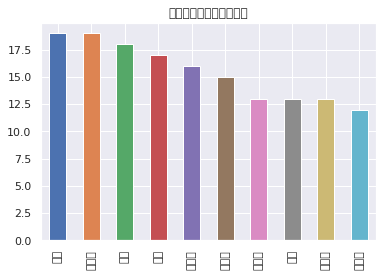

In [23]:
star_list = df_tmp_1.iloc[:, 8:-3].reset_index().drop('index', axis=1)
count_list  = star_list.apply(lambda x:x.sum()).sort_values(ascending=False)[:10]
count_list.plot.bar(title='演出次数最多的十大演员')

In [8]:
one_hot_list = pd.get_dummies(df_tmp_1[['director', 'screenwriter','tag','region','language']])
df_result = pd.merge(df_tmp_1.drop(df_tmp_1.columns[[0,1,2,3,4]], axis=1), one_hot_list, left_index=True, right_index=True)
df_result.head(10)

,film_length,collections,rating_num,戴安·罗赛尔,孙修雅,杰森·莫玛,黄霑,唐古特·宝日夫,魏璐,俞君茹,...,language_英语 / 汉语普通话 / 阿拉伯语,language_英语 / 法语 / 德语 / 阿拉伯语,language_英语 / 瑞典语,language_英语 / 瑞典语 / 丹麦语,language_英语 / 粤语,language_英语 / 粤语 / 汉语普通话,language_英语 / 西班牙语,language_英语 / 越南语 / 日语,language_英语 / 韩语,language_韩语
0,118.0,520018.0,6.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,87.0,6235.0,2.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,132.0,7726.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,96.0,29414.0,5.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,157.0,38155.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
5,113.0,91456.0,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
6,109.0,91375.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
7,105.0,2313.0,3.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
8,96.0,37819.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
9,108.0,40339.0,4.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = df_result[df_result.columns.difference(['rating_num'])].values
Y = df_result['rating_num'].values
sc_X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(sc_X, Y, test_size=0.2)

In [10]:
ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(n_estimators=20), learning_rate=0.0001).fit(X_train, Y_train)
pred = ada.predict(X_test)

In [11]:
pd.DataFrame(np.concatenate((Y_test.reshape(-1,1), pred.reshape(-1,1)),axis=1), columns=['pred', 'Y_test'])

,pred,Y_test
0,4.6,5.330
1,4.6,4.915
2,5.2,4.840
3,7.8,6.430
4,5.6,5.845
5,3.1,5.035
6,6.0,5.750
7,4.7,4.815
8,5.9,5.115
9,4.4,5.205


In [12]:
print ("MAE:",metrics.mean_absolute_error(Y_test, pred))

# calculate MSE using scikit-learn
print ("MSE:",metrics.mean_squared_error(Y_test, pred))

# calculate RMSE using scikit-learn
print ("RMSE:",np.sqrt(metrics.mean_squared_error(Y_test, pred)))

# calculate R2 using scikit-learn
print ("R2:",metrics.r2_score(Y_test, pred))

MAE: 0.8306060606060605
MSE: 1.0494136363636366
RMSE: 1.0244089204822635
R2: 0.335427914306649
